# 과대적합 (Overfitting)
과대적합 (Overfitting)은 모델이 학습 데이터에만 너무 치중되어 학습 데이터의 예측 성능은 좋으나 테스트 데이터의 성능이 떨어지는 경우를 말합니다.
모델이 과대적합이 되면 일반화 되지 않은 모델이라고도 합니다.
과대적합을 야기시키는 원인은 아래와 같습니다.

- 데이터의 Variance가 높은 경우
- 너무 많은 Epoch로 학습 데이터를 학습시킨 경우
- 학습에 사용된 파라미터가 너무 많은 경우
- 데이터에 비해 모델이 너무 복잡한 경우
- 데이터에 노이즈 & Outlier가 너무 많은 경우
- 이번 실습에서는 일부러 과대적합된 모델을 만들어 보고 Loss 그래프를 통해 기존 모델과 어떻게 성능 차이가 나는지 확인해보겠습니다.

관련 링크 https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit
# 실습
작성된 코드를 보고 이해해보세요.
1. `data_num`을 바꿔가며 데이터의 개수에 따라 각 모델의 학습이 어떻게 진행되는지 확인해보세요.
2. `keras.layers.Dense()`안의 뉴런 개수를 바꿔가며 모델의 학습이 어떻게 진행되는지 확인해보세요.
3. `model.fit()` 내부에서 epoch를 바꿔가며 과소적합 되는 모델을 만들어보세요.
4. `Visualize()` 함수로 Train, Test loss 를 확인하고 과소적합 모델의 결과를 분석해보세요.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________
Train on 30 samples, validate on 30 samples
Epoch 1/40
30/30 - 0s - loss: 0.6488 - accuracy: 0.6000 - binary_crossentropy: 0.6488 - val_loss: 0.7302 - val_accuracy: 0.4667 - val_binary_crossentropy: 0.7302
Epoch 2/40
30/30 - 0s - loss: 0.6357 - accuracy: 0.7000 - binary_crossentropy: 0.6357 - val_loss: 0.7329 - val_accuracy: 0.4667 - val_binary_crossentropy: 0.7329
Epoch 3/40
30/

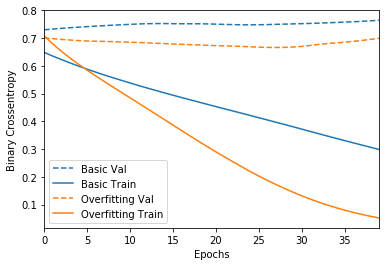

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 각각 리뷰에 따른 데이터 길이가 다르기 때문에 데이터의 Shape을 맞춰줘야합니다.
def sequences_shaping(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 각 리뷰 별 빈도수가 높은 단어를 dimension 개수 만큼만 추출하여 사용합니다.
        
    return results

# 시각화 함수
def Visulaize(histories, key='binary_crossentropy'):
    #plt.figure(figsize=(,20))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    
    plt.show()

# 100번째 까지 많이 사용하는 단어까지 추출
word_num = 100
data_num = 30

# Keras에 내장되어 있는 imdb 데이터 세트를 불러옵니다.
# IMDb 데이터 세트는 Train 25000개 test 25000개로 이루어져 있습니다.
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=word_num)

# 데이터 Shape을 맞춰주기 위한 sequence 함수를 불러옵니다.
train_data = sequences_shaping(train_data, dimension=word_num)
test_data = sequences_shaping(test_data, dimension=word_num)

# 메모리 효율 및 과대적합을 위해 데이터 중 data_num개만 사용합니다.
train_data = train_data[:data_num,:]
test_data = test_data[:data_num,:]
train_labels = train_labels[:data_num]
test_labels =test_labels[:data_num]

# 과대적합 경우와 비교하기 위해 기본 모델을 하나 만들어줍니다.
basic_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Neuron 개수를 바꿔가면서 과대적합 모델을 만들어보세요.
overfitting_model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
basic_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
basic_model.summary()
# 모델을 학습시킵니다.
basic_history = basic_model.fit(train_data,train_labels,epochs=40,batch_size=500,validation_data=(test_data, test_labels), verbose=2)

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
overfitting_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
overfitting_model.summary()
# 모델을 학습시킵니다.
# Epoch를 바꿔가면서 학습시켜보세요.
overfitting_history = overfitting_model.fit(train_data, train_labels, epochs=40, batch_size=500, validation_data=(test_data, test_labels),verbose=2)


# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('Basic', basic_history),('Overfitting', overfitting_history)])
              
